In [133]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [134]:
df = pd.read_csv("data/home_price.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [135]:
dummies = pd.get_dummies(df["town"])
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [136]:
merged = pd.concat([df, dummies], axis="columns")
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [137]:
merged.drop(columns=["town", "robinsville"], axis="columns", inplace=True)
merged

,area,price,monroe township,west windsor
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,True
6,2800,615000,False,True
7,3300,650000,False,True
8,3600,710000,False,True
9,2600,575000,False,False


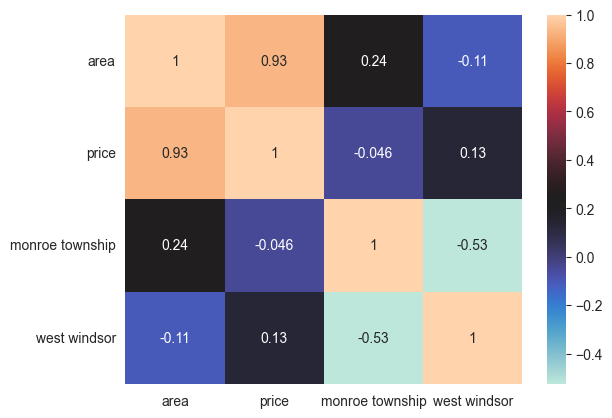

In [138]:
sns.heatmap(merged.corr(), annot=True, cmap="icefire")
plt.show()

In [139]:
X = merged.drop(columns=["price"], axis="columns")
y = merged["price"]

In [140]:
reg = LinearRegression()

In [141]:
reg.fit(X, y)

LinearRegression()

In [142]:
reg.score(X, y)

0.9573929037221872

In [143]:
d = {
    "sales": [
        100000,
        222000,
        1000000,
        522000,
        111111,
        222222,
        1111111,
        20000,
        75000,
        90000,
        1000000,
        10000,
    ],
    "city": [
        "Tampa",
        "Tampa",
        "Orlando",
        "Jacksonville",
        "Miami",
        "Jacksonville",
        "Miami",
        "Miami",
        "Orlando",
        "Orlando",
        "Orlando",
        "Orlando",
    ],
    "size": [
        "Small",
        "Medium",
        "Large",
        "Large",
        "Small",
        "Medium",
        "Large",
        "Small",
        "Medium",
        "Medium",
        "Medium",
        "Small",
    ],
}

In [144]:
dat = pd.DataFrame(data=d)
dat

,sales,city,size
0,100000,Tampa,Small
1,222000,Tampa,Medium
2,1000000,Orlando,Large
3,522000,Jacksonville,Large
4,111111,Miami,Small
5,222222,Jacksonville,Medium
6,1111111,Miami,Large
7,20000,Miami,Small
8,75000,Orlando,Medium
9,90000,Orlando,Medium


In [145]:
dat["city"].unique()

array(['Tampa', 'Orlando', 'Jacksonville', 'Miami'], dtype=object)

In [146]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(
    transform="pandas"
)

In [147]:
ohe_transform = ohe.fit_transform(dat[["city"]])
ohe_transform

,city_Jacksonville,city_Miami,city_Orlando,city_Tampa
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0


In [148]:
dat = pd.concat([dat, ohe_transform], axis=1).drop(columns=["city"])

In [149]:
dat

,sales,size,city_Jacksonville,city_Miami,city_Orlando,city_Tampa
0,100000,Small,0.0,0.0,0.0,1.0
1,222000,Medium,0.0,0.0,0.0,1.0
2,1000000,Large,0.0,0.0,1.0,0.0
3,522000,Large,1.0,0.0,0.0,0.0
4,111111,Small,0.0,1.0,0.0,0.0
5,222222,Medium,1.0,0.0,0.0,0.0
6,1111111,Large,0.0,1.0,0.0,0.0
7,20000,Small,0.0,1.0,0.0,0.0
8,75000,Medium,0.0,0.0,1.0,0.0
9,90000,Medium,0.0,0.0,1.0,0.0
